# COGS 108 - Final Project 

# Overview

I used the San Diego Yelp Data to get the average park rating within zip codes. I also used the two police calls datasets to count the total number of police calls in a given zip code. The correlation between police calls and zip codes was done through geocoding with the help of geopy. After getting the data in the right form, I performed linear analysis on it, which ultimately led me to conclude that we cannot say that there is a correlation between average park rating and total number of police calls within a given zip code.

# Name & GitHub

- Name: Ritwik Sinha
- GitHub Username: ritwikksinha

# Research Question

Does the crime rate in a neighborhood impact the Yelp rating of parks in that heighborhood?

## Background and Prior Work

Parks are usually good indicators of the quality of life in the neighborhood. The more safe and peaceful the neighborhood is, the more likely people are going to spend time in a wide open area for relaxation. Most parks are often used by families to allow children and pets to play in a less confined space than home. Therefore, a sense of safety and security would be necessary for a park to have high ratings. 

Previous studies have compared the ratings of parks with the crime rates in the neighborhood, and the frequency of park visits with the amount of violent crimes in the neighborhood. Overall, higher crime rates in the neighborhood were found to lead to lower park ratings and park visits for parks in that neighborhood. 

References (include links):
- 1)https://www.cdc.gov/pcd/issues/2020/19_0434.htm
- 2)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5818287/

# Hypothesis


I believe that a parks ratings would be directly correlated with the amount of crime in the same neighborhood. More police calls would mean more crime, which implies an unsafe neighborhood. That would prevent people from wanting to visit parks, and would lead to a decresased average rating for parks in that area.

# Dataset(s)

#### IDEAL DATASET
The ideal dataset would contain the average rating for all parks in a zip code, along with the number of calls made to the police within the same zip code.

#### REAL DATA

- Dataset Name: San Diego Parks Yelp Data (yelp_SD_parks.csv)
- Link to the dataset: https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv
- Number of observations: 833

This dataset is essentially a condensed version of the data visible on the Yelp page for each park in San Diego. We will take the zip code and rating of each park from this dataset.


- Dataset Name: Police Calls for Service 2019 (pd_calls_for_service_2019_datasd.csv)
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 590967

This dataset contains information on the police calls within San Diego for the year 2019. We will use the address to get the zip code for each call's origin, and use it to sum up the number of calls by zip code.


- Dataset Name: Police Calls for Service 2020 (pd_calls_for_service_2020_datasd.csv)
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 522569

This dataset contains information on the police calls within San Diego for the year 2020. We will use the address to get the zip code for each call's origin, and use it to sum up the number of calls by zip code.


Once we get the zip codes for each police call, we will use that to count the number of calls within a region. We will then compare the average rating for all parks within that zip code, and see how this average rating compares to the total number of police calls within that zip code.

# Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
sns.set_context('talk')

from geopy.geocoders import Nominatim

import patsy
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df_parks = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_parks.csv')
df_parks

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


In [3]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/pd_calls_for_service_2019_datasd.csv')
df_2019

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590962,E19120050370,2019-12-31 23:57:36,3,4300,NaN,OCEAN,BLV,NaN,NaN,NaN,FOOT,CAN,122,3
590963,E19120050372,2019-12-31 23:58:11,3,3400,NaN,RUFFIN,RD,NaN,NaN,NaN,415N,K,311,3
590964,E19120050373,2019-12-31 23:59:30,3,0,NaN,04TH,AVE,NaN,K,NaN,1016,A,-1,2
590965,E19120050374,2019-12-31 23:59:35,3,0,NaN,04TH,AVE,NaN,K,NaN,1016,A,523,2


In [4]:
df_2020 = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/pd_calls_for_service_2020_datasd.csv')
df_2020

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522564,E20120001602,2020-12-01 23:23:01,3,1200,NaN,K,ST,NaN,NaN,NaN,MPSSTP,K,521,2
522565,E20120001605,2020-12-01 23:28:18,3,5800,NaN,STREAMVIEW,DR,NaN,NaN,NaN,417,K,823,0
522566,E20120001608,2020-12-01 23:33:18,3,100,E,CALLE PRIMERA,NaN,NaN,NaN,NaN,T,K,712,2
522567,E20120001616,2020-12-01 23:48:27,3,100,NaN,06TH,AVE,NaN,NaN,NaN,SELENF,K,521,3


# Data Cleaning

- 1) First, we extract the rating and zip for each park.
- 2) Then we extract the priority and zip for each police call in 2019 and 2020, dropping the columns that don't have primary address information, or the beat and priority columns.
- 3) Then we append the data from 2019 and 2020 into one dataframe, and drop all columns except zip and priority.
- 4) Then we group the data by zip and priority, and group the parks data by zip code.
- 5) We now have the average park rating in each zip code, and the count of police calls in each zip code
- 6) Lastly, we join the police calls data with the parks data using an inner join using the zip codes. We now have the average rating and number of police calls according to zip code.

In [5]:
df_parks['zip'] = df_parks['address'].str.extract(r'(\d{5})') #Extracting the zip codes.
df_parks = df_parks.drop(['name','address','review_count', 'phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'], axis=1) #Removing unnecessary variables.
df_parks

,rating,zip
0,5.0,92101
1,4.5,92108
2,4.5,92101
3,4.5,92116
4,5.0,92118
...,...,...
828,4.5,92120
829,2.5,92101
830,4.0,92101
831,3.0,92008


In [6]:
df_2019.dtypes #Checking the data type of each column.

incident_num                  object
date_time                     object
day_of_week                    int64
address_number_primary         int64
address_dir_primary           object
address_road_primary          object
address_sfx_primary           object
address_dir_intersecting     float64
address_road_intersecting     object
address_sfx_intersecting     float64
call_type                     object
disposition                   object
beat                           int64
priority                       int64
dtype: object

In [7]:
df_2019.isna().any() #Checking for missing values.

incident_num                 False
date_time                    False
day_of_week                  False
address_number_primary       False
address_dir_primary           True
address_road_primary          True
address_sfx_primary           True
address_dir_intersecting      True
address_road_intersecting     True
address_sfx_intersecting      True
call_type                     True
disposition                   True
beat                         False
priority                     False
dtype: bool

In [8]:
#Cleaning primary address data, and creating a proper address from it.

def remove_empty(number_primary):  #Setting zero primary numbers to empty string.
    if number_primary == '0':
        output = ''
    else:
        output = number_primary
    return output

def remove_zero(road_primary):  #Removing starting zeroes in primary road name.
    return road_primary.lstrip('0')

def remove_nan(sfx_primary):  #Setting NaN primary suffixes to empty string.
    if (sfx_primary == 'NaN') | (sfx_primary == 'nan'):
        suffix = ''
    else:
        suffix = sfx_primary
    return suffix

df_2019.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_dir_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition'], inplace=True) #Dropping columns that we don't need.
df_2019.dropna(subset=['address_road_primary'], inplace=True) #Dropping data without street address.
df_2019.drop(df_2019.loc[df_2019['beat'] < 100].index, inplace=True) #Dropping any calls that were not within the established beats.

df_2019['address_number_primary'] = df_2019['address_number_primary'].astype(str).apply(remove_empty)
df_2019['address_road_primary'] = df_2019['address_road_primary'].astype(str).apply(remove_zero)
df_2019['address_sfx_primary'] = df_2019['address_sfx_primary'].astype(str).apply(remove_nan)

df_2019['address'] = df_2019['address_number_primary'] + " " + df_2019['address_road_primary'] + " " + df_2019['address_sfx_primary'] + ", San Diego, CA"
df_2019 = df_2019.sample(n=1500)
df_2019

,address_number_primary,address_road_primary,address_sfx_primary,beat,priority,address
585358,11100,CORTE PLENO VERANO,,934,3,"11100 CORTE PLENO VERANO , San Diego, CA"
492274,1200,IMPERIAL,AVE,541,1,"1200 IMPERIAL AVE, San Diego, CA"
434432,,BEECH,ST,526,2,"BEECH ST, San Diego, CA"
585485,4300,OSPREY,ST,618,1,"4300 OSPREY ST, San Diego, CA"
632,,ABBOTT,ST,614,3,"ABBOTT ST, San Diego, CA"
...,...,...,...,...,...,...
23029,2200,FOWLER,DR,437,2,"2200 FOWLER DR, San Diego, CA"
516683,700,8TH,AVE,524,2,"700 8TH AVE, San Diego, CA"
69230,900,6TH,AVE,523,0,"900 6TH AVE, San Diego, CA"
354092,2100,PACIFIC,HWY,527,1,"2100 PACIFIC HWY, San Diego, CA"


In [9]:
#Creating address and using geocoding to look up the zip code using geopy.

geolocator = Nominatim(user_agent="geoapi")

def get_zip(address):
    geocode_result = geolocator.geocode(address)
    if (type(geocode_result) == type(None)):
        zip_code = "0"
    else:
        zip_code = geocode_result.raw['display_name'].split(',')[-2][:6]
    return zip_code 
df_2019['zip'] = df_2019['address'].apply(get_zip)
df_2019 = df_2019[df_2019.zip != '0']
df_2019

,address_number_primary,address_road_primary,address_sfx_primary,beat,priority,address,zip
585358,11100,CORTE PLENO VERANO,,934,3,"11100 CORTE PLENO VERANO , San Diego, CA",92130
492274,1200,IMPERIAL,AVE,541,1,"1200 IMPERIAL AVE, San Diego, CA",92102
434432,,BEECH,ST,526,2,"BEECH ST, San Diego, CA",92102
585485,4300,OSPREY,ST,618,1,"4300 OSPREY ST, San Diego, CA",92107
632,,ABBOTT,ST,614,3,"ABBOTT ST, San Diego, CA",92107
...,...,...,...,...,...,...,...
23029,2200,FOWLER,DR,437,2,"2200 FOWLER DR, San Diego, CA",92139
516683,700,8TH,AVE,524,2,"700 8TH AVE, San Diego, CA",92101
69230,900,6TH,AVE,523,0,"900 6TH AVE, San Diego, CA",92103
354092,2100,PACIFIC,HWY,527,1,"2100 PACIFIC HWY, San Diego, CA",92110


In [10]:
#Repeating on 2020 data.

df_2020.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_dir_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition'], inplace=True) #Dropping columns that we don't need.
df_2020.dropna(subset=['address_road_primary'], inplace=True) #Dropping data without street address.
df_2020.drop(df_2020.loc[df_2020['beat'] < 100].index, inplace=True) #Dropping any calls that were not within the established beats.

df_2020['address_number_primary'] = df_2020['address_number_primary'].astype(str).apply(remove_empty)
df_2020['address_road_primary'] = df_2020['address_road_primary'].astype(str).apply(remove_zero)
df_2020['address_sfx_primary'] = df_2020['address_sfx_primary'].astype(str).apply(remove_nan)

df_2020['address'] = df_2020['address_number_primary'] + " " + df_2020['address_road_primary'] + " " + df_2020['address_sfx_primary'] + ", San Diego, CA"
df_2020 = df_2020.sample(n=1500)

df_2020['zip'] = df_2020['address'].apply(get_zip)
df_2020 = df_2020[df_2020.zip != '0']
df_2020

,address_number_primary,address_road_primary,address_sfx_primary,beat,priority,address,zip
508073,3300,QUIMBY,ST,612,2,"3300 QUIMBY ST, San Diego, CA",92106
521328,200,16TH,ST,521,3,"200 16TH ST, San Diego, CA",92101
193888,800,LORING,ST,122,0,"800 LORING ST, San Diego, CA",92109
176613,300,17TH,ST,521,2,"300 17TH ST, San Diego, CA",92101
423307,3500,38TH,ST,839,3,"3500 38TH ST, San Diego, CA",92104
...,...,...,...,...,...,...,...
515441,4900,SOLOLA,AVE,446,0,"4900 SOLOLA AVE, San Diego, CA",92102
30477,400,4TH,AVE,522,3,"400 4TH AVE, San Diego, CA",92101
362425,,15,,234,2,"15 , San Diego, CA",Calif
347569,500,C,ST,524,4,"500 C ST, San Diego, CA",Calif


In [11]:
#Unifying both 2019 and 2020 data and keeping only zip and priority.
df_police = df_2019.append(df_2020)
df_police.drop(columns=['address_number_primary', 'address_road_primary', 'address_sfx_primary', 'beat', 'address'], inplace=True)
df_police['zip'] = df_police['zip'].apply(str.strip) #Removing trailing and leading spaces.
df_police = df_police[df_police['zip'] != 'Calif'] #Dropping the one where we didn't get the proper zip code.
df_police

,priority,zip
585358,3,92130
492274,1,92102
434432,2,92102
585485,1,92107
632,3,92107
...,...,...
95892,2,92105
165431,2,92107
515441,0,92102
30477,3,92101


In [12]:
#Grouping police calls by zip code and priority.
df_grouped = df_police.groupby(['zip']).agg('count')
df_grouped.columns = ['total_calls']
df_grouped.reset_index(inplace=True)
df_grouped

,zip,total_calls
0,91239,17
1,91910,6
2,91911,9
3,91917,2
4,91932,28
...,...,...
61,92161,11
62,92163,38
63,92173,59
64,92179,13


In [13]:
#Grouping park ratings by zip code and finding the mean for each zip code.
df_avg_park = df_parks.groupby('zip').agg('mean')
df_avg_park.columns = ['avg_rating']
df_avg_park.reset_index(inplace=True)
df_avg_park

,zip,avg_rating
0,10152,4.00
1,10200,3.00
2,10225,4.00
3,10299,4.50
4,10375,5.00
...,...,...
176,92649,5.00
177,92661,3.50
178,92707,4.25
179,92835,5.00


In [14]:
#Merging the average park ratings and total number of police calls using zip codes in order to get the data in the required format.
df_complete = df_avg_park.merge(df_grouped, left_on='zip',right_on='zip')
df_complete

,zip,avg_rating,total_calls
0,91910,4.000000,6
1,91911,1.000000,9
2,91932,4.166667,28
3,91942,4.062500,6
4,91945,4.000000,7
5,91950,4.000000,1
6,92008,2.500000,3
7,92014,4.300000,25
8,92020,1.500000,35
9,92026,3.500000,1


# Data Analysis & Results

We will now look at how the average rating correlates to the total number of police calls (if there is any correlation at all).

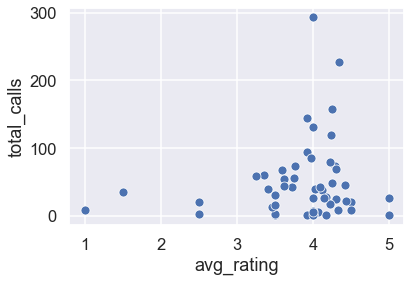

In [15]:
#Plot average rating vs total calls.
sns.scatterplot(df_complete['avg_rating'],df_complete['total_calls'])

We see from this scatter plot that there is clearly a cluster where the majority of zipcodes have average park rating above 3.5 and a total number of calls under 100. At firts glance, this seems to support our hypothesis.

### Simple linear analysis

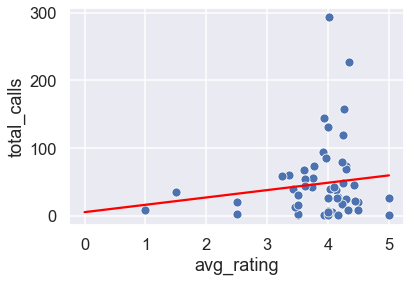

In [16]:
#Plotting the assumed line.

a, b = np.polyfit(df_complete['avg_rating'],df_complete['total_calls'], deg=1)
avg_rating = np.arange(0,5.5,0.5)
pred_calls = a*avg_rating + b

sns.scatterplot(df_complete['avg_rating'],df_complete['total_calls'])
plt.plot(avg_rating,pred_calls, color='red')

__Result:__ From this elementary linear analysis, we can see that higher average park rating leads to more total police calls in a zip code. This seems a little odd, so let's do a more detailed linear analysis of the data.

### More detailed linear analysis(OLS)

In [17]:
outcome, predictors = patsy.dmatrices('total_calls ~ avg_rating', df_complete)
model = sm.OLS(outcome, predictors)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            total_calls   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9309
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.339
Time:                        16:34:35   Log-Likelihood:                -293.96
No. Observations:                  54   AIC:                             591.9
Df Residuals:                      52   BIC:                             595.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4343     44.095      0.123      0.9

__Result:__ From this, we can see that our p-value is far above 0.05, therefore we cannot say that there is a significant correlation between the average park rating in a zip code and the total number of police calls within that zip code.

# Ethics & Privacy

In this project, I have removed all possible variables that could be used to target individuals. The only part that can lead to any kind of identification is the zip codes. Unfortunately, that is central to the analysis and therefore I cannot delete it. Overall, I believe I have adhered to the rules of ethics and privacy required for clean data science.

However, as is usual in data science, what matters most is what the data and analysis are used for. One major concern that arises from the research question itself, is that why we are asking such a question. If it is to help the Parks & Recreation department collaborate better with the Police department in order to enforce the law, then it seems like a question that must be answered. On the other hand, if the question is asked so that the Parks & Recreation department can ignore certain areas due to their biases about the neighborhood and focus on other areas, then it is a question asked in order to discriminate. 

Another major concern is the use of data from police calls to track down the location of the caller. If there is any other information that can help with identification, then providing a zip code is a huge privacy concern, and we must be extremely careful in order to mask any such information. A lot of police calls would come from people in or near their homes, and any further information can help narrow down to the individual, which is a glaring issue regarding ethics and privacy. The fact that police calls often report crime increases the stakes, since giving away the informant can lead to the criminal seeking revenge, which would put the informant's life in danger.

# Conclusion & Discussion

From our analysis, we conclude that there isn't enough evidence to prove a correlation between average park ratings and total number of police calls within a zip code. Our p-value for linear analysis was well above 0.05, therefore this conclusion is directly supported by our analysis.

One of the biggest limitations of this project is the scarcity of time. This prevents us from taking larger samples of police calls instead of just 1,500 from each year, but the time needed for a significantly larger computation is not available. While 1,500 out of over 500,000 might sound like a very small sample, in the end of finding out the total number of calls we have 2,775 police calls randomly spread over 66 zip codes, which is good enough for an analysis that can give us an initial impression of the overall trend in correlation. The p-value with 750 random samples each was also approximately 0.3 (between 0.30 and 0.35), which tells us that we have enough evidence that contradicts our hypothesis. Given the time constraints, it is satisfactory. Naturally, I would like to run the model with 3,000 random samples from each year and see if the p-value reduces by a lot. Next would be 6,000 random samples and then 12,000 random samples from each year, and if we don't see the p-value decrease significantly, then we can say with even greater certainity that the hypothesis cannot be supported by evidence.